In [62]:
import ast
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

import generate
from score import first_run_to_df

pd.set_option('display.max_columns', None)


In [2]:
df = first_run_to_df()

In [3]:
X = df.drop(['hanna_score', 'paper_number'], axis=1)
y = df['hanna_score']

In [4]:
clf = LogisticRegression(random_state=0).fit(X, y)

In [5]:
new_papers = generate.generate_papers_df(10000)

In [6]:
new_papers[['number_drips', 'paper_number']].groupby('number_drips').count()

,paper_number
number_drips,
1,1984
2,1992
3,2006
4,2022
5,1996


In [7]:
new_papers.head()

,paper_number,number_drips,corner_0,corner_location_0,drip_x_0,drip_y_0,time_0,corner_1,corner_location_1,drip_x_1,...,corner_3,corner_location_3,drip_x_3,drip_y_3,time_3,corner_4,corner_location_4,drip_x_4,drip_y_4,time_4
0,0,4,1,2,2,3,19,2.0,2.0,2.0,...,2.0,3.0,1.0,3.0,17.0,0.0,0.0,0.0,0.0,0.0
1,1,4,4,2,2,1,13,1.0,2.0,1.0,...,2.0,1.0,2.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0
2,2,4,3,3,3,3,17,4.0,3.0,1.0,...,1.0,2.0,3.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
3,3,2,2,3,1,3,5,3.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5,2,1,1,3,11,4.0,3.0,1.0,...,4.0,1.0,3.0,3.0,15.0,3.0,3.0,1.0,1.0,8.0


In [8]:
new_scores = clf.predict_proba(new_papers.drop('paper_number', axis=1))

In [9]:
new_papers['predicted_score'] = [i[1] for i in new_scores]

In [10]:
new_papers.sort_values(by='predicted_score', ascending=False).head(20)

,paper_number,number_drips,corner_0,corner_location_0,drip_x_0,drip_y_0,time_0,corner_1,corner_location_1,drip_x_1,...,corner_location_3,drip_x_3,drip_y_3,time_3,corner_4,corner_location_4,drip_x_4,drip_y_4,time_4,predicted_score
251,251,5,4,2,1,3,8,1.0,3.0,1.0,...,3.0,2.0,1.0,20.0,4.0,3.0,2.0,1.0,19.0,1.000000
327,327,5,2,2,3,2,11,1.0,2.0,2.0,...,1.0,2.0,2.0,19.0,2.0,1.0,3.0,2.0,19.0,1.000000
8119,8119,5,2,1,3,3,14,3.0,3.0,3.0,...,2.0,3.0,1.0,18.0,4.0,3.0,3.0,3.0,19.0,1.000000
4869,4869,5,4,1,1,1,18,4.0,3.0,3.0,...,3.0,1.0,1.0,18.0,1.0,2.0,3.0,3.0,18.0,1.000000
9192,9192,5,3,1,1,1,19,1.0,3.0,2.0,...,2.0,3.0,1.0,20.0,3.0,1.0,2.0,1.0,20.0,0.999999
6304,6304,5,4,1,1,2,14,3.0,2.0,1.0,...,2.0,2.0,2.0,18.0,2.0,3.0,1.0,1.0,20.0,0.999999
3440,3440,5,4,1,3,2,12,3.0,2.0,3.0,...,3.0,3.0,1.0,17.0,3.0,2.0,3.0,3.0,17.0,0.999999
9524,9524,5,3,1,1,3,20,1.0,3.0,2.0,...,1.0,2.0,2.0,19.0,3.0,3.0,2.0,3.0,10.0,0.999999
5383,5383,5,3,3,2,3,15,2.0,3.0,1.0,...,3.0,2.0,1.0,19.0,1.0,1.0,2.0,2.0,13.0,0.999999
5168,5168,5,4,3,1,1,14,4.0,2.0,2.0,...,1.0,2.0,3.0,20.0,4.0,3.0,1.0,2.0,16.0,0.999999


In [18]:
new_papers[new_papers['predicted_score'] == 1].shape

(0, 28)

<AxesSubplot:>

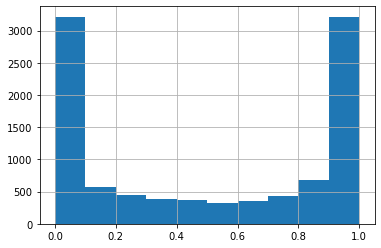

In [12]:
new_papers['predicted_score'].hist(bins=10)

<AxesSubplot:>

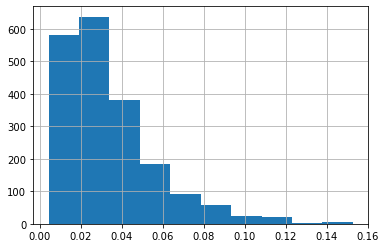

In [13]:
new_papers[new_papers['number_drips'] == 1]['predicted_score'].hist(bins=10)

<AxesSubplot:>

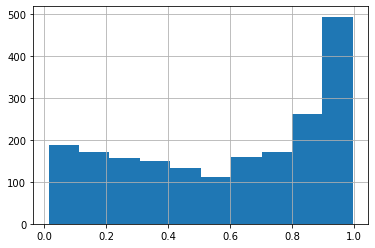

In [14]:
new_papers[new_papers['number_drips'] == 2]['predicted_score'].hist(bins=10)

<AxesSubplot:>

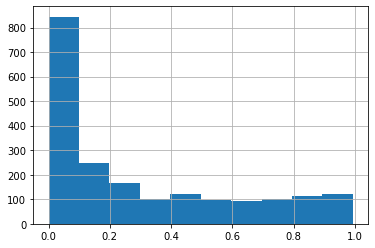

In [15]:
new_papers[new_papers['number_drips'] == 3]['predicted_score'].hist(bins=10)

<AxesSubplot:>

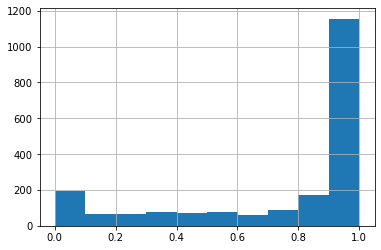

In [16]:
new_papers[new_papers['number_drips'] == 4]['predicted_score'].hist(bins=10)

In [17]:
new_papers[['number_drips', 'predicted_score']].groupby('number_drips').agg(['count', 'mean', 'min', 'max'])

predicted_score                              
                       count      mean       min       max
number_drips                                              
1                       1984  0.033698  0.004294  0.152830
2                       1992  0.593005  0.013324  0.996681
3                       2006  0.294891  0.000092  0.993811
4                       2022  0.751627  0.000473  0.999999
5                       1996  0.859443  0.000670  1.000000

In [30]:
list_df_top = [new_papers[new_papers['number_drips'] == i].sort_values(by='predicted_score', ascending=False).head(4) for i in range(2, 6)]

In [32]:
top_16_df = pd.concat(list_df_top) 
top_16_df

,paper_number,number_drips,corner_0,corner_location_0,drip_x_0,drip_y_0,time_0,corner_1,corner_location_1,drip_x_1,drip_y_1,time_1,corner_2,corner_location_2,drip_x_2,drip_y_2,time_2,corner_3,corner_location_3,drip_x_3,drip_y_3,time_3,corner_4,corner_location_4,drip_x_4,drip_y_4,time_4,predicted_score
5853,5853,2,4,1,1,3,17,3.0,3.0,1.0,2.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.996681
1505,1505,2,4,1,3,1,19,4.0,3.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.996021
6674,6674,2,4,2,1,3,12,3.0,3.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995087
788,788,2,3,1,3,2,17,4.0,3.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.994465
4380,4380,3,4,2,1,2,19,4.0,3.0,1.0,1.0,18.0,4.0,1.0,1.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.993811
2992,2992,3,3,3,2,3,14,4.0,3.0,2.0,3.0,20.0,4.0,3.0,2.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.989707
7937,7937,3,4,2,1,3,19,4.0,2.0,1.0,3.0,20.0,1.0,3.0,1.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.986972
5667,5667,3,1,1,2,3,14,4.0,3.0,1.0,3.0,20.0,3.0,3.0,2.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.985498
4564,4564,4,2,1,3,1,11,2.0,3.0,1.0,3.0,18.0,3.0,3.0,1.0,2.0,3.0,3.0,2.0,3.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.999999
655,655,4,3,1,3,3,17,2.0,2.0,1.0,1.0,20.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.999996


In [33]:
top_16_df.to_csv('run_2.csv')

In [35]:
scores_round_2 = {5853: 0, 1505: 0, 6674: 1, 788: 1, 4380: 0, 2992: 1, 7937: 0, 5667: 1, 4564: 1, 655: 0, 2969: 1, 3290: 1, 251: 1, 327: 1, 8119: 0, 4869: 1}
top_16_df['hanna_score'] = top_16_df['paper_number'].map(scores_round_2)  

In [41]:
all_painted = pd.concat([top_16_df, df])
all_painted.to_csv('all_painted.csv')

In [53]:
X_2 = all_painted.drop(['hanna_score', 'paper_number', 'predicted_score'], axis=1)
y_2 = all_painted['hanna_score']

min_max_scaler = MinMaxScaler()
X_2_minmax = min_max_scaler.fit_transform(X_2)

clf_2 = LogisticRegression(random_state=0).fit(X_2_minmax, y_2)

In [56]:
new_papers_2 = generate.generate_papers_df(10000)

new_papers_2[['number_drips', 'paper_number']].groupby('number_drips').count()

new_papers_2_minmax = min_max_scaler.transform(new_papers_2.drop('paper_number', axis=1))

new_scores_2 = clf_2.predict_proba(new_papers_2_minmax)

new_papers_2['predicted_score'] = [i[1] for i in new_scores_2]

In [57]:
new_papers_2.head()

,paper_number,number_drips,corner_0,corner_location_0,drip_x_0,drip_y_0,time_0,corner_1,corner_location_1,drip_x_1,drip_y_1,time_1,corner_2,corner_location_2,drip_x_2,drip_y_2,time_2,corner_3,corner_location_3,drip_x_3,drip_y_3,time_3,corner_4,corner_location_4,drip_x_4,drip_y_4,time_4,predicted_score
0,0,5,1,1,3,1,9,2.0,3.0,3.0,2.0,8.0,3.0,2.0,1.0,2.0,16.0,4.0,1.0,3.0,3.0,8.0,2.0,2.0,1.0,2.0,4.0,0.860234
1,1,3,1,1,2,3,19,1.0,1.0,2.0,3.0,15.0,4.0,3.0,2.0,2.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.531895
2,2,3,1,2,2,1,5,1.0,2.0,3.0,3.0,16.0,1.0,3.0,2.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.671362
3,3,3,2,1,3,2,9,1.0,2.0,1.0,1.0,10.0,2.0,3.0,3.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.401228
4,4,5,1,1,1,3,3,1.0,2.0,3.0,2.0,4.0,3.0,3.0,3.0,1.0,20.0,2.0,1.0,3.0,3.0,19.0,1.0,1.0,3.0,3.0,16.0,0.836563


1


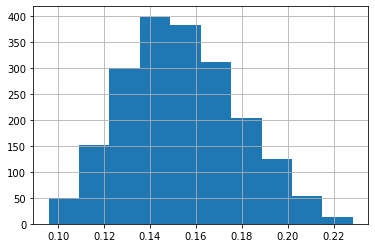

2


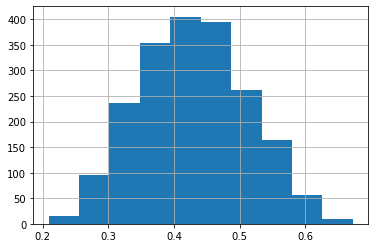

3


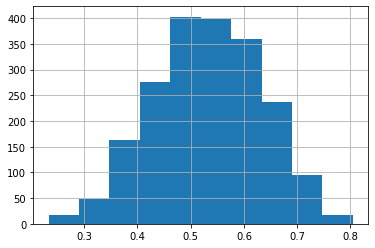

4


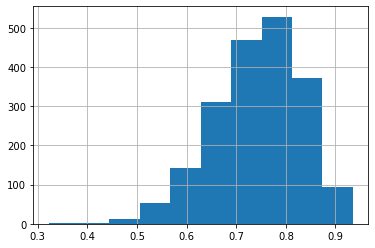

5


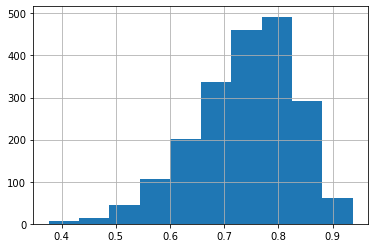

In [76]:
for i in range(1, 6):
    print(i)
    new_papers_2[new_papers_2['number_drips'] == i]['predicted_score'].hist(bins=10)
    plt.show()

In [64]:
new_papers_2[['number_drips', 'predicted_score']].groupby('number_drips').agg(['count', 'mean', 'min', 'max'])

predicted_score                              
                       count      mean       min       max
number_drips                                              
1                       1993  0.153691  0.095797  0.228394
2                       1992  0.429167  0.208695  0.672370
3                       2015  0.532142  0.233037  0.804737
4                       1985  0.743050  0.321517  0.935125
5                       2015  0.738966  0.375978  0.937612

In [87]:
list_df_top_2 = [new_papers_2[new_papers_2['number_drips'] == i].sort_values(by='predicted_score', ascending=False).head(4) for i in range(1, 6)]
top_20_df_2 = pd.concat(list_df_top_2) 
top_20_df_2.to_csv("runs/run_3.csv")

In [93]:
#imported from csv since I changed some drips that were duplicate
top_20_df_2_csv = pd.read_csv("runs/drips - run_3.csv").drop("Unnamed: 0", axis=1)

#scores_round_3 = {4489: 1, 4351: 1, 9671: 0, 7369: 1, 656: 1, 6853: 1, 3309: 0, 6210: 0, 5665: 1, 1361: 1, 4495: 0, 5032: 1, 3993: 1, 2540: 1, 2866: 1, 402: 0, 2104: 0, 4218: 1, 1013: 0, 1394: 1}
#top_20_df_2['hanna_score'] = top_20_df_2['paper_number'].map(scores_round_3)  

In [94]:
df['iteration'] = 0
top_16_df['iteration'] = 1
top_20_df_2_csv['iteration'] = 2 
all_painted = pd.concat([top_16_df, df, top_20_df_2_csv])
all_painted.to_csv('all_painted.csv')

In [95]:
X_3 = all_painted.drop(['hanna_score', 'paper_number', 'predicted_score', 'iteration'], axis=1)
y_3 = all_painted['hanna_score']

min_max_scaler = MinMaxScaler()
X_3_minmax = min_max_scaler.fit_transform(X_3)

clf_3 = LogisticRegression(random_state=0).fit(X_3_minmax, y_3)

In [96]:
new_papers_3 = generate.generate_papers_df(10000)

new_papers_3[['number_drips', 'paper_number']].groupby('number_drips').count()

new_papers_3_minmax = min_max_scaler.transform(new_papers_3.drop('paper_number', axis=1))

new_scores_3 = clf_3.predict_proba(new_papers_3_minmax)

new_papers_3['predicted_score'] = [i[1] for i in new_scores_3]

1


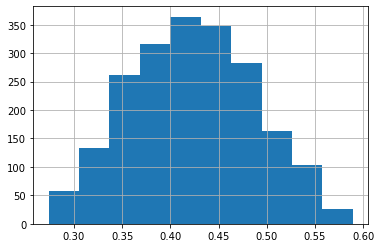

2


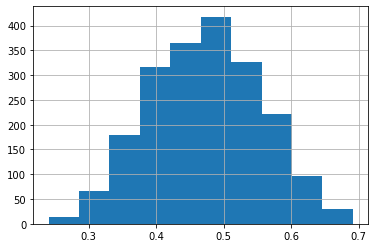

3


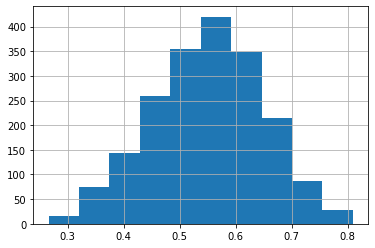

4


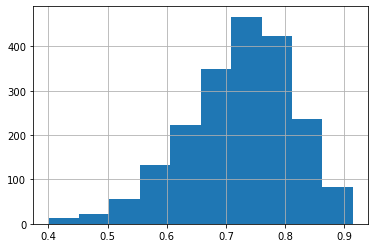

5


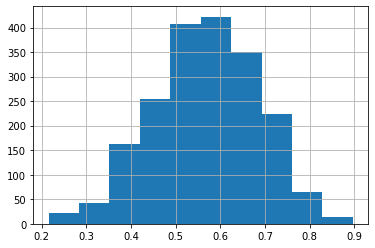

In [97]:
for i in range(1, 6):
    print(i)
    new_papers_3[new_papers_3['number_drips'] == i]['predicted_score'].hist(bins=10)
    plt.show()

In [98]:
new_papers_3[['number_drips', 'predicted_score']].groupby('number_drips').agg(['count', 'mean', 'min', 'max'])

predicted_score                              
                       count      mean       min       max
number_drips                                              
1                       2056  0.422811  0.273557  0.589458
2                       2033  0.473434  0.240284  0.691639
3                       1946  0.550124  0.265635  0.809463
4                       2003  0.723163  0.400128  0.914742
5                       1962  0.566796  0.215166  0.896654

In [106]:
columns = list(new_papers_3.columns)
columns.remove('paper_number')
new_papers_3 = new_papers_3.drop_duplicates(columns)
list_df_top_3 = [new_papers_3[new_papers_3['number_drips'] == i].sort_values(by='predicted_score', ascending=False).head(5) for i in range(2, 6)]
top_20_df_3 = pd.concat(list_df_top_3) 
top_20_df_3.to_csv("runs/run_4.csv")

In [112]:
scores_round_3 = {2847: 0, 1142: 0, 5048: 0, 4198: 0, 9175: 0, 72: 0, 6025: 0, 6728: 1, 7649: 0, 3300: 0, 1106: 1, 6725: 1, 4906: 1, 9964: 1, 593: 1, 873: 1, 3345: 0, 594: 1, 7871: 1, 4730: 1}
top_20_df_3['hanna_score'] = top_20_df_3['paper_number'].map(scores_round_3) 

In [113]:
top_20_df_3.head()

,paper_number,number_drips,corner_0,corner_location_0,drip_x_0,drip_y_0,time_0,corner_1,corner_location_1,drip_x_1,drip_y_1,time_1,corner_2,corner_location_2,drip_x_2,drip_y_2,time_2,corner_3,corner_location_3,drip_x_3,drip_y_3,time_3,corner_4,corner_location_4,drip_x_4,drip_y_4,time_4,predicted_score,hanna_score
2847,2847,2,3,2,3,1,4,2.0,3.0,3.0,1.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.691639,0
1142,1142,2,3,1,2,1,3,3.0,3.0,3.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.690472,0
5048,5048,2,4,1,2,1,7,1.0,3.0,2.0,2.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.682647,0
4198,4198,2,4,2,3,1,5,2.0,3.0,2.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.680039,0
9175,9175,2,3,3,3,1,4,1.0,3.0,3.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.680036,0


In [114]:
top_20_df_3['iteration'] = 3 
all_painted = pd.concat([top_16_df, df, top_20_df_2_csv, top_20_df_3])
all_painted.to_csv('all_painted.csv')

In [116]:
X_4 = all_painted.drop(['hanna_score', 'paper_number', 'predicted_score', 'iteration'], axis=1)
y_4 = all_painted['hanna_score']

min_max_scaler = MinMaxScaler()
X_4_minmax = min_max_scaler.fit_transform(X_4)

clf_4 = LogisticRegression(random_state=0).fit(X_4_minmax, y_4)

In [117]:
new_papers_4 = generate.generate_papers_df(10000)

new_papers_4[['number_drips', 'paper_number']].groupby('number_drips').count()

new_papers_4_minmax = min_max_scaler.transform(new_papers_4.drop('paper_number', axis=1))

new_scores_4 = clf_4.predict_proba(new_papers_4_minmax)

new_papers_4['predicted_score'] = [i[1] for i in new_scores_4]

1


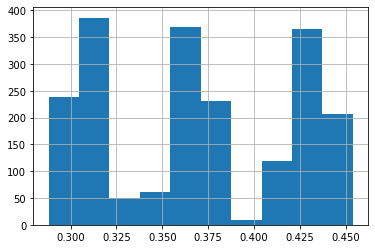

2


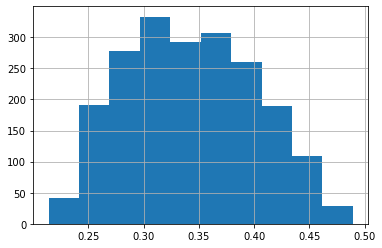

3


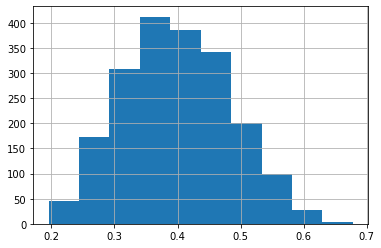

4


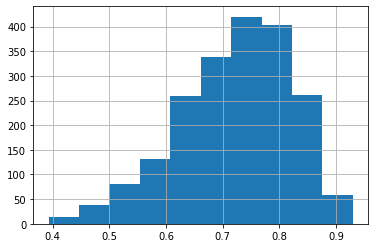

5


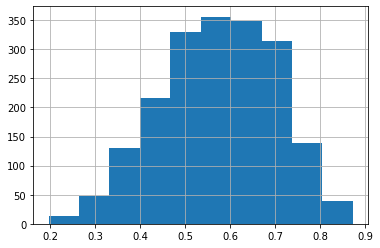

In [118]:
for i in range(1, 6):
    print(i)
    new_papers_4[new_papers_4['number_drips'] == i]['predicted_score'].hist(bins=10)
    plt.show()

In [120]:
new_papers_4[['number_drips', 'predicted_score']].groupby('number_drips').agg(['count', 'mean', 'min', 'max'])

predicted_score                              
                       count      mean       min       max
number_drips                                              
1                       2034  0.369121  0.288033  0.453838
2                       2030  0.342599  0.214006  0.489439
3                       1997  0.399365  0.195357  0.678272
4                       2004  0.722405  0.392893  0.930034
5                       1935  0.572667  0.195713  0.872522

In [128]:
columns = list(new_papers_4.columns)
columns.remove('paper_number')
new_papers_4 = new_papers_4.drop_duplicates(columns)
list_df_top_4 = [new_papers_4[new_papers_4['number_drips'] == i].sort_values(by='predicted_score', ascending=False).head(5) for i in range(2, 6)] + [df.sample(4)]
top_20_df_4 = pd.concat(list_df_top_4) 
top_20_df_4.to_csv("runs/run_5.csv")

In [129]:
scores_round_4 = {4670: 0, 2320: 0, 293: 0, 6485: 0, 8786: 1, 892: 1, 9333: 0, 3787: 1, 4734: 0, 9280: 0, 4529: 0, 9463: 1, 1898: 1, 3051: 1, 5450: 0, 8348: 0, 1455: 1, 4239: 1, 5956: 1, 7728: 0, 9: 0, 0: 0, 3: 1, 8: 0}
top_20_df_4['hanna_score'] = top_20_df_4['paper_number'].map(scores_round_4) 

In [130]:
top_20_df_4.head()

,paper_number,number_drips,corner_0,corner_location_0,drip_x_0,drip_y_0,time_0,corner_1,corner_location_1,drip_x_1,drip_y_1,time_1,corner_2,corner_location_2,drip_x_2,drip_y_2,time_2,corner_3,corner_location_3,drip_x_3,drip_y_3,time_3,corner_4,corner_location_4,drip_x_4,drip_y_4,time_4,predicted_score,hanna_score,iteration
4670,4670,2,4,3,1,2,11,1.0,3.0,1.0,3.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.489439,0,NaN
2320,2320,2,2,3,1,2,14,1.0,3.0,1.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.488801,0,NaN
293,293,2,2,3,1,3,8,1.0,1.0,1.0,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.486554,0,NaN
6485,6485,2,1,3,1,2,7,1.0,2.0,1.0,2.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.486428,0,NaN
8786,8786,2,3,3,1,1,5,1.0,3.0,1.0,3.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.483184,1,NaN


In [131]:
top_20_df_4['iteration'] = 4 
all_painted = pd.concat([top_16_df, df, top_20_df_2_csv, top_20_df_3, top_20_df_4])
all_painted.to_csv('all_painted.csv')